<a href="https://colab.research.google.com/github/xuyi0619/Past-work-of-statistical-analysis/blob/main/Kmeans%2CHierarchial%20Clustering%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-3-856f7ef35930>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
df = pd.read_csv('/content/winequality-red (2).csv', index_col=0, sep=';')
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [ ]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(X)

KMeans(n_clusters=2, n_init=20, random_state=0)

In [ ]:
km1.predict(X)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
km1.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
X['cluster'] = km1.labels_
display(X.groupby('cluster').mean()) #cluster means

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,
0,0.482099,-0.595566,-0.107976,-0.120566,0.125149,0.154350,-0.175906,0.369915,-0.362825,-0.229831,-0.326656
1,-0.753279,0.930573,0.168712,0.188384,-0.195545,-0.241171,0.274853,-0.577991,0.566914,0.359110,0.510400


In [ ]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
km1 = KMeans(n_clusters=3, n_init=20, random_state=0)
km1.fit(X)
X['cluster'] = km1.labels_
display(X.groupby('cluster').mean()) #cluster means

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,
0,0.574597,-0.830991,-0.234697,-0.164653,-0.265733,-0.364888,-0.382745,0.595427,-0.342288,-0.025295,-0.207593
1,0.035548,0.124545,0.407205,0.006404,1.006692,1.252246,0.337278,-0.191508,-0.205858,-0.559674,-0.456036
2,-0.770409,0.983047,0.000389,0.208400,-0.406196,-0.460821,0.244176,-0.628164,0.596567,0.449845,0.608626


1.1 Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.


Cluster with high value of wine quality has higher alcohol content, higher sulphates, lower pH, medium density, lower total sulfur dioxide, lower free sulfur dioxide, higher chlorides, medium residual sugar, high citric acid, and low volatile acidity.

Cluster with low value of wine quality has lower alcohol content, medium sulphates, medium pH, higher density, higher total sulfer dioxide, high freesulfur dioxide, medium chlorides, higher residual sugar, medium citric acid, and medium volatile acidity.

1.2 If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

The most important characteristics are alcohol content, total sulfur dioxide, and free sulfur dioxide.

2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
ac = AgglomerativeClustering(n_clusters=3,   # note that we select the clusters
                             affinity='euclidean',
                             linkage='complete')
ac.fit_predict(X)    # extract cluster labels for each observation in data
X['cluster'] = ac.labels_
display(X.groupby('cluster').mean())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,
0,0.285215,0.395524,2.299556,0.359368,2.305904,2.401767,0.184217,-0.692396,-0.267913,-0.260935,-0.199454
1,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
2,-0.006876,-0.014178,-0.059132,-0.023512,-0.059746,-0.062114,-0.005722,0.021210,-0.000484,0.007937,0.006932


2.1 Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.



The cluster of higher value of wine quality has higher alcohol content, medium sulphates, higher pH, lower density,lower total sulfur dioxide, lower level of chlorides, lower free sulfur dioxide, lower residual sugar, lower citric acid, and medium volatile acidity.

The cluster of low value of wine quality has lower alcohol content, higher sulphates, lower pH, higher density, medium total sulfer dioxide, medium free sulfur dioxide, high chlorides, medium residual sugar, higher citric acid, and lower volatile acidity.

2.2 If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

According to the result of hierarchial clustering, some important characteristics are alcohol content, pH, density, chlorides, and citric acid.

The most important feature is alcohol content. Both ways of clustering agree that lower level of alcohol content is a feature of bad wine, higher level of alcohol content is a feature of good wine. Higher density is a feature of bad wine. Lower level of free sulfure dioxide and total sulfur dioxide are a feature of good wine. K means shows that lower level of residual sugar is a feature of higher quality of wine, and hierarchial clustering shows that higher residual sugar is related to lower quality of wine. Since the outcomes of both models are in agreement, my opinioin on these features will remain the same.

My opinion changed on these features: However, according to the figure, there are diffences in how clusters are formed for these two ways of clustering (which is excepted, but interferes with the conclusion of important features). Lower volitile acid is associated with lower quality of wine in hierarchial clustering but associated with higher quality of wine in k means clustering. Higher level of citric acid is associated with lower quality of wine in hierarchial clustering but associated with higher quality of wine in k means clustering. Higher chlorides is associated with lower quality of wine in hierarchial clustering but associated with higher quality of wine in k means clustering. Lower pH is associated with lower quality of wine in hierarchial clustering but associated with higher quality of wine in k means clustering. Higher sulphates is associated with lower quality of wine in hierarchial clustering but associated with higher quality of wine in k means clustering.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


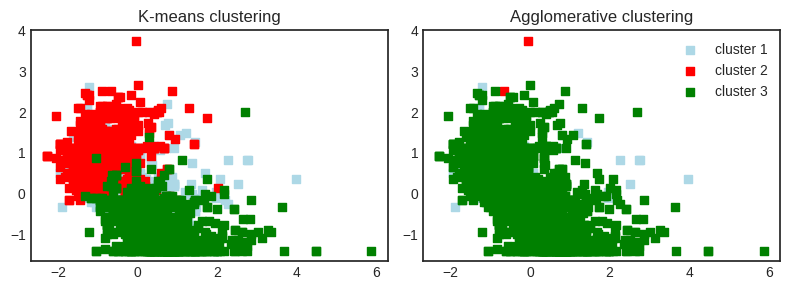

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
X = np.array(X)
km = KMeans(n_clusters=2, random_state=0)
y_km = km1.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='s', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(X[y_km == 2, 0], X[y_km == 2, 1],
            c='green', marker='s', s=40, label='cluster 3')
ax1.set_title('K-means clustering')


y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='s', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.scatter(X[y_ac == 2, 0], X[y_ac == 2, 1], c='green',
            marker='s', s=40, label='cluster 3')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

3. Use Principal Components Analysis to reduce the dimensions of your data.

In [ ]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

PCA().fit(X).components_.T


array([[-0.33392389,  0.3456707 , -0.15473035,  0.09942837,  0.36184329,
         0.21824194, -0.49472843,  0.35073861, -0.29460973, -0.06636109,
         0.31248444],
       [ 0.52490018, -0.14683105,  0.00243413, -0.14903223, -0.17485273,
         0.16834424,  0.24188199,  0.24913374, -0.46572676,  0.04720537,
         0.53111805],
       [ 0.18729587,  0.16391764,  0.23293662, -0.51288216,  0.6238647 ,
         0.14625014,  0.12682637, -0.13662975,  0.36079155,  0.09910938,
         0.18815312],
       [ 0.28494344,  0.18397516, -0.16867186,  0.55444974,  0.32817401,
         0.3536511 ,  0.20326246, -0.44753759, -0.21816933,  0.05020022,
        -0.15685962],
       [ 0.02707698,  0.25760906,  0.63992173,  0.11905168, -0.1110927 ,
        -0.06567765, -0.02646069, -0.18411411, -0.10216317, -0.65693664,
         0.12639185],
       [ 0.08282368,  0.36122504,  0.54619462,  0.0881886 , -0.18887146,
         0.10186466, -0.09022186,  0.2032663 , -0.08742243,  0.62874028,
        -0.241

In [ ]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,10
volatile acidity,-0.333924,0.345671,-0.154730,0.099428,0.361843,0.218242,-0.494728,0.350739,-0.294610,-0.066361,0.312484
citric acid,0.524900,-0.146831,0.002434,-0.149032,-0.174853,0.168344,0.241882,0.249134,-0.465727,0.047205,0.531118
residual sugar,0.187296,0.163918,0.232937,-0.512882,0.623865,0.146250,0.126826,-0.136630,0.360792,0.099109,0.188153
chlorides,0.284943,0.183975,-0.168672,0.554450,0.328174,0.353651,0.203262,-0.447538,-0.218169,0.050200,-0.156860
free sulfur dioxide,0.027077,0.257609,0.639922,0.119052,-0.111093,-0.065678,-0.026461,-0.184114,-0.102163,-0.656937,0.126392
total sulfur dioxide,0.082824,0.361225,0.546195,0.088189,-0.188871,0.101865,-0.090222,0.203266,-0.087422,0.628740,-0.241014
density,0.358931,0.325266,-0.215759,-0.321528,0.145748,-0.431026,-0.089567,0.097911,-0.364669,-0.167027,-0.479501
pH,-0.452980,-0.057771,0.154127,0.060786,0.290681,-0.473495,0.479281,-0.074649,-0.393300,0.209091,0.147113
sulphates,0.358078,-0.116885,0.078448,0.516022,0.287958,-0.435053,-0.054629,0.419305,0.345528,-0.011701,0.123154
alcohol,-0.079249,-0.501722,0.261956,-0.029032,0.291539,0.363364,0.108874,0.388050,-0.184634,-0.209394,-0.463822


In [ ]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X))
df_plot

,0,1,2,3,4,5,6,7,8,9,10
0,-1.877619,1.192494,-1.099323,-0.032438,0.250037,-0.992488,0.106119,-0.153072,-0.206295,0.110587,-0.209002
1,-0.924359,2.087390,0.145443,0.722812,0.391189,0.487099,-1.272306,0.420660,0.508734,-0.550395,-0.075603
2,-0.928970,1.410712,-0.583122,0.413484,0.196444,0.168942,-0.696411,0.325697,0.441135,-0.078375,-0.237070
3,1.745779,-0.237967,0.057620,-0.734518,-1.647271,-0.092139,0.048205,-0.344501,-0.454354,0.192445,0.007917
4,-1.877619,1.192494,-1.099323,-0.032438,0.250037,-0.992488,0.106119,-0.153072,-0.206295,0.110587,-0.209002
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.712963,0.623294,0.957119,0.746783,-0.164574,0.139852,0.528082,-0.368768,0.059442,-0.981224,0.197268
1595,-1.330598,-0.357315,2.227926,0.874027,0.316167,-0.824374,0.010191,-0.120583,-0.088910,-1.111051,0.236315
1596,-0.725451,-0.512583,1.209980,0.644048,0.307529,-0.580258,-0.074220,-0.212414,0.142068,-0.799422,0.001652
1597,-1.726673,0.726343,1.013563,0.918583,0.194707,-0.817901,0.661613,0.097196,-0.139621,-0.842115,0.629538


In [ ]:
pca.explained_variance_

array([2.49323706, 2.24318306, 1.62617432, 1.13427663, 0.96436692,
       0.66205243, 0.56495849, 0.47040913, 0.38631225, 0.30181129,
       0.16010201])

In [ ]:
pca.explained_variance_ratio_

array([0.22651616, 0.2037982 , 0.14774158, 0.10305157, 0.08761489,
       0.06014894, 0.05132774, 0.04273772, 0.03509733, 0.02742023,
       0.01454563])

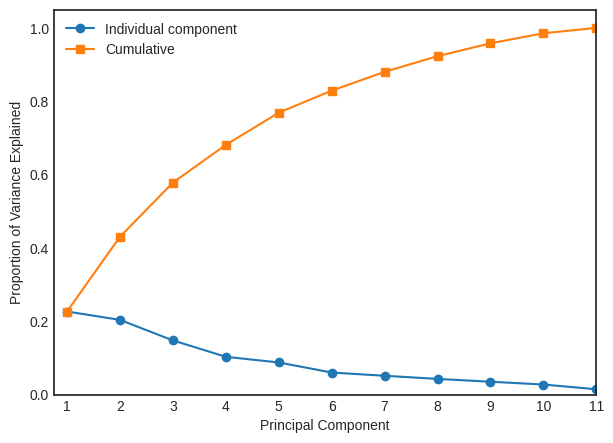

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10,11],pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11],np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.legend(loc=2);

3.1 How much of the variation in your data is explained by the first two principal components.

The first two PCs explain 43% of the original varaibility.  

3.2 How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

PCA reduces the number of features in the data by extracting a set of principal components that explain the maximum amount of variance in the data. In supervised learning (for example linear regression or decision tree), principal components are used like any other features, except that the information they contain is not so strainght forword. An example will be that the training set is trained based on the two components as input features and the wine price is the target varaible. The testing set tests the accuracy of the model, which is how well the model is at predicting the wine price.
